In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Settings
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [15]:
# Load the data
data_path = Path("../src/taxipred/data/taxi_trip_pricing.csv")
df = pd.read_csv(data_path)

# Basic info
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset shape: (1000, 11)
Rows: 1000, Columns: 11


In [16]:
# First look at the data
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [17]:
# Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [18]:
# Statistical summary
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [19]:
# Missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nPercentage missing:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing values per column:
Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

Percentage missing:
Trip_Distance_km         5.0
Time_of_Day              5.0
Day_of_Week              5.0
Passenger_Count          5.0
Traffic_Conditions       5.0
Weather                  5.0
Base_Fare                5.0
Per_Km_Rate              5.0
Per_Minute_Rate          5.0
Trip_Duration_Minutes    5.0
Trip_Price               4.9
dtype: float64


In [24]:
# Check if missing values are in the same rows
print("Rows with ANY missing values:")
rows_with_nulls = df[df.isnull().any(axis=1)]
print(f"Total: {len(rows_with_nulls)} rows")

print("\nFirst few rows with missing values:")
print(rows_with_nulls.head())

Rows with ANY missing values:
Total: 438 rows

First few rows with missing values:
   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
1             47.59   Afternoon     Weekday              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   
6              3.85   Afternoon     Weekday              4.0   
7             43.44     Evening     Weekend              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
1               High   Clear        NaN         0.62             0.43   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   
6               High    Rain       3.51         1.66              NaN   
7                NaN   Clear       2.97         1.87             0.23   

   Trip_Duration_Minutes  Trip_Price  
1                  40.57         NaN  
3              

In [21]:
# Rows where ONLY Trip_Price is missing - good for predictions later!
only_price_missing = df[df['Trip_Price'].isnull() & df.drop('Trip_Price', axis=1).notnull().all(axis=1)]
print(f"Rows with only Trip_Price missing: {len(only_price_missing)}")
print("\nThese will be useful for testing predictions later!")
only_price_missing.head()

Rows with only Trip_Price missing: 26

These will be useful for testing predictions later!


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
32,4.19,Morning,Weekday,1.0,Low,Clear,4.07,1.89,0.19,69.06,NaN
94,38.78,Morning,Weekday,3.0,Medium,Clear,3.08,1.62,0.15,90.14,NaN
167,10.14,Afternoon,Weekday,4.0,Low,Rain,4.50,1.62,0.38,25.41,NaN
178,46.90,Evening,Weekday,1.0,High,Clear,4.14,1.33,0.13,66.38,NaN


In [22]:
# Data with Trip_Price (for training)
df_with_price = df[df['Trip_Price'].notnull()].copy()
print(f"Rows with price for training: {len(df_with_price)}")

Rows with price for training: 951


In [23]:
# Remove rows with any missing values in features
df_clean = df_with_price.dropna().copy()
print(f"Rows after removing nulls: {len(df_clean)}")
print(f"Removed: {len(df_with_price) - len(df_clean)} rows")

Rows after removing nulls: 562
Removed: 389 rows


count    562.000000
mean      57.663525
std       43.958741
min        6.126900
25%       33.583875
50%       50.157850
75%       69.146575
max      332.043689
Name: Trip_Price, dtype: float64


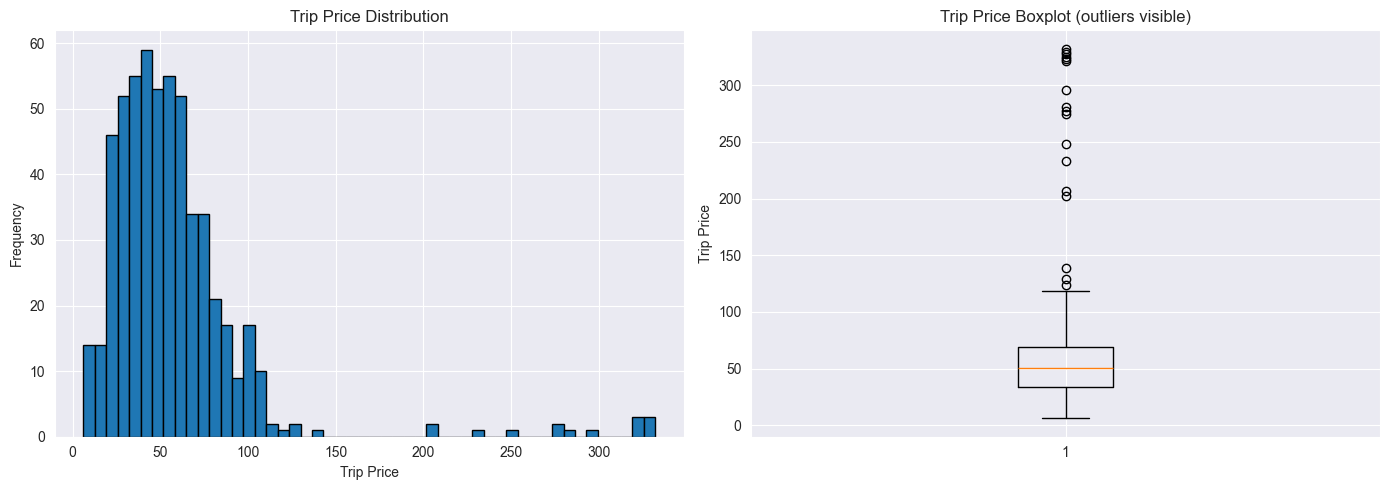

In [13]:
# Check price distribution
print(df_clean['Trip_Price'].describe())

# Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['Trip_Price'], bins=50, edgecolor='black')
axes[0].set_xlabel('Trip Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Trip Price Distribution')

# Boxplot
axes[1].boxplot(df_clean['Trip_Price'])
axes[1].set_ylabel('Trip Price')
axes[1].set_title('Trip Price Boxplot (outliers visible)')

plt.tight_layout()
plt.show()

In [25]:
# Remove outliers using IQR method
Q1 = df_clean['Trip_Price'].quantile(0.25)
Q3 = df_clean['Trip_Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Remove outliers
df_final = df_clean[(df_clean['Trip_Price'] >= lower_bound) & 
                     (df_clean['Trip_Price'] <= upper_bound)].copy()

print(f"\nRows before outlier removal: {len(df_clean)}")
print(f"Rows after outlier removal: {len(df_final)}")
print(f"Outliers removed: {len(df_clean) - len(df_final)}")

IQR: 35.56
Lower bound: -19.76
Upper bound: 122.49

Rows before outlier removal: 562
Rows after outlier removal: 545
Outliers removed: 17


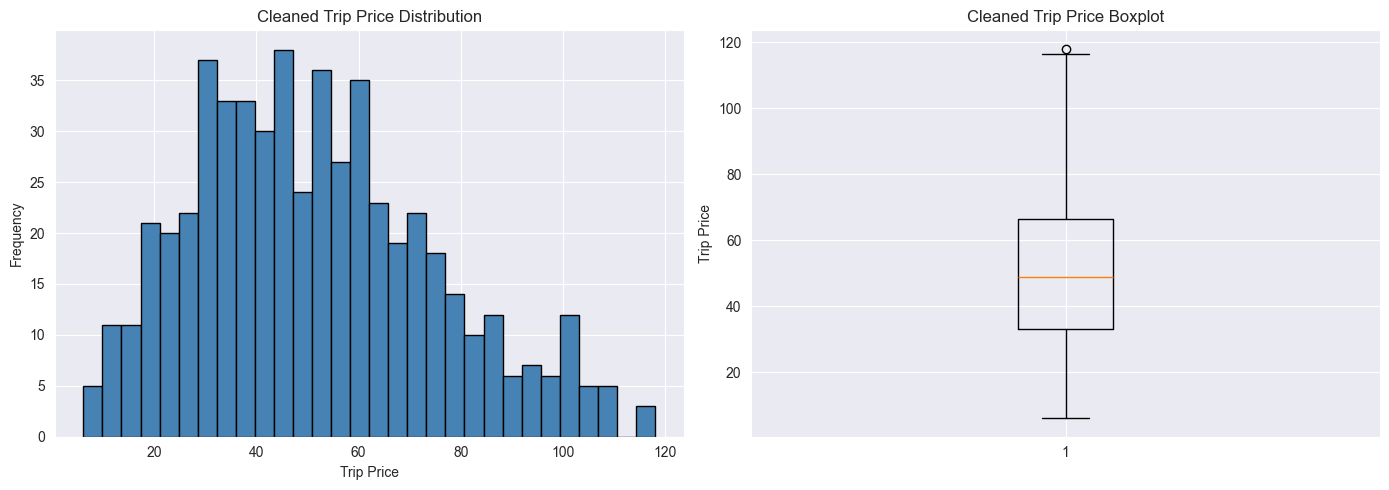

count    545.000000
mean      51.450541
std       23.584796
min        6.126900
25%       33.183000
50%       48.780200
75%       66.536300
max      118.032100
Name: Trip_Price, dtype: float64


In [26]:
# Visualize cleaned price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_final['Trip_Price'], bins=30, edgecolor='black', color='steelblue')
axes[0].set_xlabel('Trip Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Cleaned Trip Price Distribution')

# Boxplot
axes[1].boxplot(df_final['Trip_Price'])
axes[1].set_ylabel('Trip Price')
axes[1].set_title('Cleaned Trip Price Boxplot')

plt.tight_layout()
plt.show()

print(df_final['Trip_Price'].describe())

In [27]:
# Check our features
print("Columns in cleaned data:")
print(df_final.columns.tolist())
print(f"\nShape: {df_final.shape}")
print(f"\nData types:")
print(df_final.dtypes)

Columns in cleaned data:
['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

Shape: (545, 11)

Data types:
Trip_Distance_km         float64
Time_of_Day               object
Day_of_Week               object
Passenger_Count          float64
Traffic_Conditions        object
Weather                   object
Base_Fare                float64
Per_Km_Rate              float64
Per_Minute_Rate          float64
Trip_Duration_Minutes    float64
Trip_Price               float64
dtype: object


In [30]:
# Manual outlier check
df[df['Trip_Price'] > 150]  

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
22,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,201.869509
27,138.098328,Evening,Weekend,4.0,Medium,Rain,2.24,1.75,0.32,94.86,280.877302
64,146.067047,Afternoon,Weekday,2.0,Medium,Clear,4.79,0.73,0.30,60.81,320.958664
108,112.830958,Afternoon,Weekday,2.0,High,Snow,3.35,1.90,0.23,78.63,233.008285
110,102.747556,Evening,Weekday,2.0,Medium,Clear,2.23,1.80,0.23,53.09,274.535087
141,109.616082,Afternoon,Weekday,4.0,High,Clear,4.46,1.69,0.23,53.88,327.217665
225,130.809001,Afternoon,Weekday,1.0,High,Clear,3.93,0.63,0.16,88.31,328.871769
267,116.196064,Afternoon,Weekend,4.0,Medium,Clear,2.20,0.85,0.25,19.63,206.699570
268,139.062230,Afternoon,Weekday,2.0,Low,Rain,2.80,1.82,0.14,50.83,276.840597
287,100.380420,Afternoon,Weekday,3.0,Medium,Rain,4.46,NaN,NaN,89.21,329.913004


In [28]:
# Export cleaned training data
output_path = Path("../src/taxipred/data/taxi_trip_pricing_cleaned.csv")
df_final.to_csv(output_path, index=False)
print(f"Saved cleaned data to: {output_path}")
print(f"Shape: {df_final.shape}")

# Also save the rows with only price missing (for predictions later)
prediction_path = Path("../src/taxipred/data/taxi_for_prediction.csv")
only_price_missing.to_csv(prediction_path, index=False)
print(f"\nSaved prediction data to: {prediction_path}")
print(f"Shape: {only_price_missing.shape}")

Saved cleaned data to: ..\src\taxipred\data\taxi_trip_pricing_cleaned.csv
Shape: (545, 11)

Saved prediction data to: ..\src\taxipred\data\taxi_for_prediction.csv
Shape: (26, 11)
